## Question 1.1: Describe how you would frame the 8-puzzle problem as a search problem.

A problem can be described as a search problem if there is an algorithmic way to verify its answer. A search problem contains a search space and a goal condition. The search space comprises different states, with operators allowing movement between these states. Being composed of states allows the problem to be represented as a graph, allowing a graph solving algorithm to solve it; hence there being an algorithmic way to verify the answer.  

The 8-puzzle problem can be seen as a search problem since it can be defined by a search space and a goal condition. The states in this search space is a three by three grid containing the location of each tile. Each tile can be represented with an integer value, with zero representing the blank tile. The operators move the blank tile left, right, up or down. The blank tile cannot move beyond the boundaries of the grid. The goal condition is the goal state. The path cost should be one per move to minimise the cost of finding the solution.

## Question 1.2: Solve the 8-puzzle problem using A⋆.

#### 1) Outline the A⋆ algorithm

The A* algorithm is an informed search algorithm. Being informed means, it uses a heuristic to inform its search, finding the goal quicker.

It has the evaluation function of f(n) = g(n) + h(n), with n representing the current state. The function g(n) is the number of nodes traversed from start to current. The function h(n) is the heuristic function to estimate the cost of reaching the goal from the state n. The heuristic function must be admissible for every state; it should never overestimate the cost to reach the goal. A good heuristic should provide as much information to allow for fewer states to be searched, improving the algorithm's performance.

#### Stats:
* Complete: Yes.
* Time: Exponential, unless the heuristic is very accurate.
* Space: Exponential since it keeps all nodes in memory.
* Optimal: Yes if the heuristic is admissible.

#### Pseudocode:
1.   Initialize the list of open states, putting the starting state in this list.
2.   Initialize the list of closed states.
3.   Initilise the current state as nothing.
4.   While the open list is not empty and the current state is not the goal then 
5.   Find the state with minimum f score in the open list and set this to the current state.
6.   Generate the successors of the current state.
7.   For each successor generate a f score using the evaluation function.
8.   If the successor is not in the closed list then store the successor in the open list.
9.   END FOR
10.  Remove the current state from open and move it to closed.
11.  END WHILE

#### 2) Describe two admissible heuristic functions for the 8-puzzle problem

Euclidian distance is a heuristic function for the 8-puzzle problem. The length of a straight line between two points is calculated using the Pythagorean theorem. It can be used as a heuristic by finding each tile's x and y coordinates in both the current and goal grid. Then for each value, find the euclidian distance between the current and goal coordinate. Sum up all these distances to get a h score. Euclidian distance is an admissible heuristic function as it never overestimates the cost to reach the goal; it will return zero if the current coordinate is in the exact location as the goal coordinate.

#### Pseudocode:
1. Initialise the h score
2. Initialise the current list
3. Initialise the goal list
4. For each row in the current grid
5. For each column in the current grid
6. Add the coordinates of the value at row and column of current grid
7. Add the coordinates of the value at row and column of goal grid
8. END FOR
9. END FOR
10. For each value from 0 to 9
11. Calculate the euclidian distance between the current value's coordinates on both the current grid and goal grid.
12. Add this value to h score.
13. END FOR

Manhattan distance is another heuristic function for the 8-puzzle problem. It is the sum of absolute differences between two points. It can be used as a heuristic by looping through each value in both the goal grid and current grid and calculating the absolute difference for each value. Then sum these together to get a h score. Manhattan distance is an admissible heuristic function as it never overestimates the cost to reach the goal; it will return zero if there is no difference between the values (they are the same value).

#### Pseudocode:
1. Initialise the h score
2. For the number of rows in the grid
3. For the columns in the current grid
3. Calculate the absolute difference of the value at row and column of current and goal grid.
4. Add this value to the h score
5. END FOR
6. END FOR


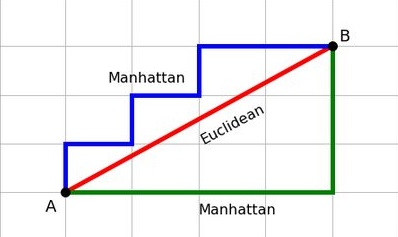

Figure 1: An image showing the difference between euclidean and manhattan distance. It shows that the manhattan distance shall find a longer path and may produce multiple paths. This image was taken from https://www.omnicalculator.com/math/manhattan-distance
####3) Then, you should implement two versions of the A⋆ algorithm in Python to solve the 8-puzzle using the two heuristic functions you have chosen.

The first script is using euclidean distance and the second is using manhattan distance as the heuristic. Both scripts are using the same start and goal state taken from the coursework's figure 1. 

In [ ]:
"""This solves the eight puzzle problem using A-star algorithm.
The heuristic being used is the euclidian distance."""
import copy
import datetime
from math import sqrt


class State:
    """This class is used to represent the current state
     of the 8-puzzle during the A-Star algorithm."""

    def __init__(self, grid, move, goal=None, g_score=0):
        self.grid = grid  # This is the current state of the grid, represented as a 2d array.
        self.move = move  # This is previous move made.
        self.g_score = g_score  # This is the number of moves needed to reach this state.
        self.zero_pos = self.find_zero()
        # This is the location of zero in the grid, which is the stand in for the blank space.
        self.f_score = self.calculate_f_score(goal)
        # f score is the estimated cost of the cheapest path to the goal or objective state.

    def __eq__(self, other):
        """This is used to compare if two
         different 8-puzzle grids are the same."""
        if other is None:
            return False
        if not isinstance(other, State):
            raise TypeError
        for row in range(0, 3):
            for column in range(0, 3):
                if self.grid[row][column] != other.grid[row][column]:
                    return False
        return True

    def find_zero(self):
        """This function is used to find the position of zero in the grid."""
        zero_pos = []
        for row in range(0, 3):
            for column in range(0, 3):
                if self.grid[row][column] == 0:
                    zero_pos = [row, column]
        return zero_pos

    def calculate_h_score(self, goal):
        """This function is used to calculate the h score -
        the euclidian distance between each item in the grid and their goal state."""
        h_score = 0
        current_dict = {}
        goal_dict = {}
        for row in range(0, 3):
            for column in range(0, 3):
                current_dict[self.grid[row][column]] = [row, column]
                goal_dict[goal.grid[row][column]] = [row, column]

        for value in range(0, 9):
            current_coord = current_dict.get(value)
            goal_coord = goal_dict.get(value)
            h_score += sqrt((current_coord[0] - goal_coord[0]) ** 2
                            + (current_coord[1] - goal_coord[1]) ** 2)
        return round(h_score, 2)

    def calculate_f_score(self, goal):
        """This function is used to calculate the f score -
        the estimated cost of the cheapest path to the goal or objective state."""
        if goal is None:
            return self.g_score
        return self.g_score + self.calculate_h_score(goal)

    def left(self, goal):
        """This function is used move the blank space
         (represented by zero) to the left in the grid."""
        if self.zero_pos[1] == 0:
            return None
        left_grid = copy.deepcopy(self.grid)
        left_grid[self.zero_pos[0]][self.zero_pos[1]] = \
            left_grid[self.zero_pos[0]][self.zero_pos[1] - 1]
        left_grid[self.zero_pos[0]][self.zero_pos[1] - 1] = 0
        return State(grid=left_grid, move="left", g_score=self.g_score + 1, goal=goal)

    def right(self, goal):
        """This function is used move the blank space
         (represented by zero) to the right in the grid."""
        if self.zero_pos[1] == 2:
            return None
        right_grid = copy.deepcopy(self.grid)
        right_grid[self.zero_pos[0]][self.zero_pos[1]] = \
            right_grid[self.zero_pos[0]][self.zero_pos[1] + 1]
        right_grid[self.zero_pos[0]][self.zero_pos[1] + 1] = 0
        return State(grid=right_grid, move="right", g_score=self.g_score + 1, goal=goal)

    def up(self, goal):
        """This function is used move the blank space
         (represented by zero) up in the grid."""
        if self.zero_pos[0] == 0:
            return None
        up_grid = copy.deepcopy(self.grid)
        up_grid[self.zero_pos[0]][self.zero_pos[1]] = \
            up_grid[self.zero_pos[0] - 1][self.zero_pos[1]]
        up_grid[self.zero_pos[0] - 1][self.zero_pos[1]] = 0
        return State(grid=up_grid, move="up", g_score=self.g_score + 1, goal=goal)

    def down(self, goal):
        """This function is used move the blank space
         (represented by zero) down in the grid."""
        if self.zero_pos[0] == 2:
            return None
        down_grid = copy.deepcopy(self.grid)
        down_grid[self.zero_pos[0]][self.zero_pos[1]] = \
            down_grid[self.zero_pos[0] + 1][self.zero_pos[1]]
        down_grid[self.zero_pos[0] + 1][self.zero_pos[1]] = 0
        return State(grid=down_grid, move="down", g_score=self.g_score + 1, goal=goal)

    def check_moves(self, goal):
        """This function will move the current grid
         in all directions and return them"""
        left = self.left(goal)
        right = self.right(goal)
        up = self.up(goal)
        down = self.down(goal)
        return [left, right, up, down]

    def print_grid(self):
        """This displays the information about the state."""
        print("Move Number:", self.g_score)
        print("Previous Move:", self.move)
        print(self.grid[0])
        print(self.grid[1])
        print(self.grid[2])
        print("\n")


class AStar:
    """This is used to set up the A-star algorithm
     and solve the 8-puzzle problem."""

    def __init__(self, start, goal):
        self.start = start
        self.goal = goal
        self.open = {start.calculate_f_score(self.goal): [self.start]}
        # The states open, in a list with a key of their f score.
        self.closed = {}  # The states that have already been explored.

    def check_closed(self, state):
        """This function checks if the current state
        is already in closed and shouldn't be searched."""
        if state is None:
            return True
        if state.f_score in self.closed:
            array = self.closed[state.f_score]
            for other in array:
                if other == state:
                    return True
        return False

    def reconstruct_path(self, current_state):
        """This is used to reconstruct the path taken to the goal in reverse.
        This is so it can be displayed."""
        total_steps = current_state.g_score
        while current_state.move != 'Start':
            current_state.print_grid()
            # This will do the opposite move that was done to find the previous state.
            if current_state.move == 'up':
                current_state = current_state.down(self.goal)
            elif current_state.move == 'down':
                current_state = current_state.up(self.goal)
            elif current_state.move == 'right':
                current_state = current_state.left(self.goal)
            elif current_state.move == 'left':
                current_state = current_state.right(self.goal)

            for state in self.closed[current_state.f_score - 2]:
                if state == current_state:
                    current_state = state
        self.start.print_grid()
        print("Total number of steps:", total_steps)

    def solve(self):
        """Using the A-star algorithm this solves the 8 puzzle problem."""
        current = None
        iteration = 0
        while current != self.goal and self.open:
            min_f_score = min(self.open.keys())
            current = self.open.get(min_f_score)[0]
            moves = current.check_moves(self.goal)
            # Goes through all the possible moves and adds them to open.
            for move in moves:
                if not self.check_closed(move):
                    if move.f_score in self.open:
                        self.open[move.f_score].append(move)
                    else:
                        self.open[move.f_score] = [move]
            # Removes the current state from open since its moves have been explored.
            if len(self.open[min_f_score]) > 1:
                self.open[min_f_score].remove(current)
            else:
                self.open.pop(min_f_score)
            # Adds the state that was removed from open to closed
            # to prevent searching that state multiple times.
            if min_f_score in self.closed:
                self.closed[min_f_score].append(current)
            else:
                self.closed[min_f_score] = [current]
            iteration += 1
        self.reconstruct_path(current)
        print("This took",iteration,"iterations to complete.")
        



def main():
    """The main function used to initialise the solver."""
    print("The A* algorithm 8 puzzle solver!")
    print("This uses euclidian distance as the heuristic.")
    print("This will take a few minutes...")

    start_grid = [[7, 2, 4],[5, 0, 6],[8, 3, 1]]
    goal_grid = [[0, 1, 2],[3, 4, 5],[6, 7, 8]]

    end = State(grid=goal_grid, move="Goal")
    initial = State(grid=start_grid, move="Start", goal=end)
    game = AStar(initial, end)
    initial_time = datetime.datetime.now()
    game.solve()
    end_time = datetime.datetime.now()
    print("This took:",end_time - initial_time, "seconds")


if __name__ == '__main__':
    main()


In [ ]:
"""This solves the eight puzzle problem using A-star algorithm.
The heuristic being used is the manhattan distance."""
import copy
import datetime


class State:
    """This class is used to represent the current state
     of the 8-puzzle during the A-Star algorithm."""

    def __init__(self, grid, move, goal=None, g_score=0):
        self.grid = grid  # This is the current state of the grid, represented as a 2d array.
        self.move = move  # This is previous move made.
        self.g_score = g_score  # This is the number of moves needed to reach this state.
        self.zero_pos = self.find_zero()
        # This is the location of zero in the grid, which is the stand in for the blank space.
        self.f_score = self.calculate_f_score(goal)
        # f score is the estimated cost of the cheapest path to the goal or objective state.

    def __eq__(self, other):
        """This is used to compare if two
         different 8-puzzle grids are the same."""
        if other is None:
            return False
        if not isinstance(other, State):
            raise TypeError
        for row in range(0, 3):
            for column in range(0, 3):
                if self.grid[row][column] != other.grid[row][column]:
                    return False
        return True

    def find_zero(self):
        """This function is used to find the position of zero in the grid."""
        zero_pos = []
        for row in range(0, 3):
            for column in range(0, 3):
                if self.grid[row][column] == 0:
                    zero_pos = [row, column]
        return zero_pos

    def calculate_h_score(self, goal):
        """This function is used to calculate the h score -
        the manhattan distance between each item
        in the grid and their goal state."""
        h_score = 0
        for row in range(0, 3):
            h_score += sum(abs(current_item - goal_item) for current_item, goal_item in
                           zip(self.grid[row], goal.grid[row]))
        return h_score

    def calculate_f_score(self, goal):
        """This function is used to calculate the f score -
        the estimated cost of the cheapest
        path to the goal or objective state."""
        if goal is None:
            return self.g_score
        return self.g_score + self.calculate_h_score(goal)

    def left(self, goal):
        """This function is used move the blank space
         (represented by zero) to the left in the grid."""
        if self.zero_pos[1] == 0:
            return None
        left_grid = copy.deepcopy(self.grid)
        left_grid[self.zero_pos[0]][self.zero_pos[1]] = \
            left_grid[self.zero_pos[0]][self.zero_pos[1] - 1]
        left_grid[self.zero_pos[0]][self.zero_pos[1] - 1] = 0
        return State(grid=left_grid, move="left",
                     g_score=self.g_score + 1, goal=goal)

    def right(self, goal):
        """This function is used move the blank space
         (represented by zero) to the right in the grid."""
        if self.zero_pos[1] == 2:
            return None
        right_grid = copy.deepcopy(self.grid)
        right_grid[self.zero_pos[0]][self.zero_pos[1]] = \
            right_grid[self.zero_pos[0]][self.zero_pos[1] + 1]
        right_grid[self.zero_pos[0]][self.zero_pos[1] + 1] = 0
        return State(grid=right_grid, move="right",
                     g_score=self.g_score + 1, goal=goal)

    def up(self, goal):
        """This function is used move the blank space
         (represented by zero) up in the grid."""
        if self.zero_pos[0] == 0:
            return None
        up_grid = copy.deepcopy(self.grid)
        up_grid[self.zero_pos[0]][self.zero_pos[1]] = \
            up_grid[self.zero_pos[0] - 1][self.zero_pos[1]]
        up_grid[self.zero_pos[0] - 1][self.zero_pos[1]] = 0
        return State(grid=up_grid, move="up",
                     g_score=self.g_score + 1, goal=goal)

    def down(self, goal):
        """This function is used move the blank space
         (represented by zero) down in the grid."""
        if self.zero_pos[0] == 2:
            return None
        down_grid = copy.deepcopy(self.grid)
        down_grid[self.zero_pos[0]][self.zero_pos[1]] = \
            down_grid[self.zero_pos[0] + 1][self.zero_pos[1]]
        down_grid[self.zero_pos[0] + 1][self.zero_pos[1]] = 0
        return State(grid=down_grid, move="down",
                     g_score=self.g_score + 1, goal=goal)

    def check_moves(self, goal):
        """This function will move the current grid
         in all directions and return them"""
        left = self.left(goal)
        right = self.right(goal)
        up = self.up(goal)
        down = self.down(goal)
        return [left, right, up, down]

    def print_grid(self):
        """This displays the information about the state."""
        print("Move Number:", self.g_score)
        print("Previous Move:", self.move)
        print(self.grid[0])
        print(self.grid[1])
        print(self.grid[2])
        print("\n")


class AStar:
    """This is used to set up the A-star algorithm
     and solve the 8-puzzle problem."""

    def __init__(self, start, goal):
        self.start = start
        self.goal = goal
        self.open = {start.calculate_f_score(self.goal): [self.start]}
        # The states open, in a list with a key of their f score.
        self.closed = {}  # The states that have already been explored.

    def check_closed(self, state):
        """This function checks if the current state
        is already in closed and shouldn't be searched."""
        if state is None:
            return True
        if state.f_score in self.closed:
            array = self.closed[state.f_score]
            for other in array:
                if other == state:
                    return True
        return False

    def reconstruct_path(self, current_state):
        """This is used to reconstruct the path taken to the goal in reverse.
        This is so it can be displayed."""
        total_steps = current_state.g_score
        while current_state.move != 'Start':
            current_state.print_grid()
            # This will do the opposite move that
            # was done to find the previous state.
            if current_state.move == 'up':
                current_state = current_state.down(self.goal)
            elif current_state.move == 'down':
                current_state = current_state.up(self.goal)
            elif current_state.move == 'right':
                current_state = current_state.left(self.goal)
            elif current_state.move == 'left':
                current_state = current_state.right(self.goal)

            for state in self.closed[current_state.f_score - 2]:
                if state == current_state:
                    current_state = state
        self.start.print_grid()
        print("Total number of steps:", total_steps)

    def solve(self):
        """Using the A-star algorithm this solves the 8 puzzle problem."""
        current = None
        iteration = 0
        while current != self.goal and self.open:
            min_f_score = min(self.open.keys())
            current = self.open.get(min_f_score)[0]
            moves = current.check_moves(self.goal)
            # Goes through all the possible moves and adds them to open.
            for move in moves:
                if not self.check_closed(move):
                    if move.f_score in self.open:
                        self.open[move.f_score].append(move)
                    else:
                        self.open[move.f_score] = [move]
            # Removes the current state from open
            # since its moves have been explored.
            if len(self.open[min_f_score]) > 1:
                self.open[min_f_score].remove(current)
            else:
                self.open.pop(min_f_score)
            # Adds the state that was removed from open to closed
            # to prevent searching that state multiple times.
            if min_f_score in self.closed:
                self.closed[min_f_score].append(current)
            else:
                self.closed[min_f_score] = [current]
            iteration += 1
        self.reconstruct_path(current)
        print("This took",iteration,"iterations to complete.")


def main():
    """The main function used to initialise the solver."""
    print("The A* algorithm 8 puzzle solver!")
    print("This uses manhattan distance as the heuristic.")
    print("This will take a few minutes...")

    start_grid = [[7, 2, 4],[5, 0, 6],[8, 3, 1]]
    goal_grid = [[0, 1, 2],[3, 4, 5],[6, 7, 8]]

    end = State(grid=goal_grid, move="Goal")
    initial = State(grid=start_grid, move="Start", goal=end)
    game = AStar(initial, end)
    initial_time = datetime.datetime.now()
    game.solve()
    end_time = datetime.datetime.now()
    print("This took:", end_time - initial_time, "seconds")


if __name__ == '__main__':
    main()


#### 4) Briefly discuss and compare the results given by A⋆ when using the two different heuristic functions

For this example, the euclidean distance takes about 2 minutes and solves the problem in only 26 moves with 150,953 iterations. However, manhattan distance takes 50 seconds but solves the problem in 30 moves with 22,836 iterations.

These statistics show that the euclidian distance is worse than the manhattan distance. This is because euclidean required 6.6 times the number of iterations than the manhattan distance and resulted in about 2.5 times the time to solve. This means that euclidean distance is less informative than manhattan distance, thus requiring more iterations to solve. On the other hand, euclidean distance provides a more optimal solution than manhattan distance taking fewer moves to get to the goal state. 

Despite this, each iteration of euclidian distance (taking 0.8 ms) was faster than a manhattan distance (taking 2.2 ms). This could suggest that the heuristic for euclidean distance is faster than manhattan distance or that euclidean distance was finding more states in the dictionary of closed states.

## Question 1.3: General solution of the 8-puzzle using A⋆.

The general solution for the 8-puzzle uses the manhattan distance as a heuristic since it performed significantly faster, despite not providing an optimal result.

To allow for a general solution, inputs have been added for the goal grid and starting grid. Before these can be solved, they must be appropriately checked. Each inputted grid is checked that contains the numbers 0 to 8, with no duplicates. Once this is complete, each grid's parity is checked by counting the number of inversions. The parity is true if there are an even number of inversions and odd if the opposite. It is only solvable when the parity of the goal grid is the same as the start grid. This is true since any movement of the blank tile in the grid results in the same parity as before, so if the starting grid starts with a different parity to the goal grid, one more inversion will need to be made making it unsolvable. 

In [ ]:
"""This solves the eight puzzle problem using A-star algorithm.
The heuristic being used is the manhattan distance."""
import copy
import datetime

    
class State:
    """This class is used to represent the current state
     of the 8-puzzle during the A-Star algorithm."""

    def __init__(self, grid, move, goal=None, g_score=0):
        self.grid = grid  # This is the current state of the grid, represented as a 2d array.
        self.move = move  # This is previous move made.
        self.g_score = g_score  # This is the number of moves needed to reach this state.
        self.zero_pos = self.find_zero()
        # This is the location of zero in the grid, which is the stand in for the blank space.
        self.f_score = self.calculate_f_score(goal)
        # f score is the estimated cost of the cheapest path to the goal or objective state.

    def __eq__(self, other):
        """This is used to compare if two
         different 8-puzzle grids are the same."""
        if other is None:
            return False
        if not isinstance(other, State):
            raise TypeError
        for row in range(0, 3):
            for column in range(0, 3):
                if self.grid[row][column] != other.grid[row][column]:
                    return False
        return True

    def find_zero(self):
        """This function is used to find the position of zero in the grid."""
        zero_pos = []
        for row in range(0, 3):
            for column in range(0, 3):
                if self.grid[row][column] == 0:
                    zero_pos = [row, column]
        return zero_pos

    def calculate_h_score(self, goal):
        """This function is used to calculate the h score -
        the manhattan distance between each item in the grid and their goal state."""
        h_score = 0
        for row in range(0, 3):
            h_score += sum(abs(current_item - goal_item) for current_item, goal_item in
                           zip(self.grid[row], goal.grid[row]))
        return h_score

    def calculate_f_score(self, goal):
        """This function is used to calculate the f score -
        the estimated cost of the cheapest path to the goal or objective state."""
        if goal is None:
            return self.g_score
        return self.g_score + self.calculate_h_score(goal)

    def left(self, goal):
        """This function is used move the blank space
         (represented by zero) to the left in the grid."""
        if self.zero_pos[1] == 0:
            return None
        left_grid = copy.deepcopy(self.grid)
        left_grid[self.zero_pos[0]][self.zero_pos[1]] = \
            left_grid[self.zero_pos[0]][self.zero_pos[1] - 1]
        left_grid[self.zero_pos[0]][self.zero_pos[1] - 1] = 0
        return State(grid=left_grid, move="left", g_score=self.g_score + 1, goal=goal)

    def right(self, goal):
        """This function is used move the blank space
         (represented by zero) to the right in the grid."""
        if self.zero_pos[1] == 2:
            return None
        right_grid = copy.deepcopy(self.grid)
        right_grid[self.zero_pos[0]][self.zero_pos[1]] = \
            right_grid[self.zero_pos[0]][self.zero_pos[1] + 1]
        right_grid[self.zero_pos[0]][self.zero_pos[1] + 1] = 0
        return State(grid=right_grid, move="right", g_score=self.g_score + 1, goal=goal)

    def up(self, goal):
        """This function is used move the blank space
         (represented by zero) up in the grid."""
        if self.zero_pos[0] == 0:
            return None
        up_grid = copy.deepcopy(self.grid)
        up_grid[self.zero_pos[0]][self.zero_pos[1]] = \
            up_grid[self.zero_pos[0] - 1][self.zero_pos[1]]
        up_grid[self.zero_pos[0] - 1][self.zero_pos[1]] = 0
        return State(grid=up_grid, move="up", g_score=self.g_score + 1, goal=goal)

    def down(self, goal):
        """This function is used move the blank space
         (represented by zero) down in the grid."""
        if self.zero_pos[0] == 2:
            return None
        down_grid = copy.deepcopy(self.grid)
        down_grid[self.zero_pos[0]][self.zero_pos[1]] = \
            down_grid[self.zero_pos[0] + 1][self.zero_pos[1]]
        down_grid[self.zero_pos[0] + 1][self.zero_pos[1]] = 0
        return State(grid=down_grid, move="down", g_score=self.g_score + 1, goal=goal)

    def check_moves(self, goal):
        """This function will move the current grid
         in all directions and return them"""
        left = self.left(goal)
        right = self.right(goal)
        up = self.up(goal)
        down = self.down(goal)
        return [left, right, up, down]

    def print_grid(self):
        """This displays the information about the state."""
        print("Move Number:", self.g_score)
        print("Previous Move:", self.move)
        print(self.grid[0])
        print(self.grid[1])
        print(self.grid[2])
        print("\n")


class AStar:
    """This is used to set up the A-star algorithm
     and solve the 8-puzzle problem."""

    def __init__(self, start, goal):
        self.start = start
        self.goal = goal
        self.open = {start.calculate_f_score(self.goal): [self.start]}
        # The states open, in a list with a key of their f score.
        self.closed = {}  # The states that have already been explored.

    def check_closed(self, state):
        """This function checks if the current state
        is already in closed and shouldn't be searched."""
        if state is None:
            return True
        if state.f_score in self.closed:
            array = self.closed[state.f_score]
            for other in array:
                if other == state:
                    return True
        return False

    def reconstruct_path(self, current_state):
        """This is used to reconstruct the path taken to the goal in reverse.
        This is so it can be displayed."""
        total_steps = current_state.g_score
        while current_state.move != 'Start':
            current_state.print_grid()
            # This will do the opposite move that was done to find the previous state.
            if current_state.move == 'up':
                current_state = current_state.down(self.goal)
            elif current_state.move == 'down':
                current_state = current_state.up(self.goal)
            elif current_state.move == 'right':
                current_state = current_state.left(self.goal)
            elif current_state.move == 'left':
                current_state = current_state.right(self.goal)

            for state in self.closed[current_state.f_score - 2]:
                if state == current_state:
                    current_state = state
        self.start.print_grid()
        print("Total number of steps:", total_steps)

    def solve(self):
        """Using the A-star algorithm this solves the 8 puzzle problem."""
        current = None
        while current != self.goal :
            min_f_score = min(self.open.keys())
            current = self.open.get(min_f_score)[0]
            moves = current.check_moves(self.goal)
            # Goes through all the possible moves and adds them to open.
            for move in moves:
                if not self.check_closed(move):
                    if move.f_score in self.open:
                        self.open[move.f_score].append(move)
                    else:
                        self.open[move.f_score] = [move]
            # Removes the current state from open since its moves have been explored.
            if len(self.open[min_f_score]) > 1:
                self.open[min_f_score].remove(current)
            else:
                self.open.pop(min_f_score)
            # Adds the state that was removed from open to closed
            # to prevent searching that state multiple times.
            if min_f_score in self.closed:
                self.closed[min_f_score].append(current)
            else:
                self.closed[min_f_score] = [current]
        self.reconstruct_path(current)


def parity(grid):
    """Gets the parity of the grid, even is True and odd is False."""
    grid = [item for row in grid for item in row]
    inversions = 0
    for i in range(0, 9):
        if grid[i] == 0:
            continue
        for j in range(i + 1, 9):
            if grid[j] == 0:
                continue
            if grid[i] > grid[j]:
                inversions += 1
    return inversions % 2 == 0


def check_input(inpt):
    """This is used to check if the input contains the correct numbers in any order."""
    if inpt is None:
        return False
    if {1, 2, 3, 4, 5, 6, 7, 8, 0} == set(inpt):
        return True
    print("Error - Invalid Input")
    return False


def main():
    """The main function used to initialise the solver."""
    print("The A* algorithm 8 puzzle solver!")
    print("This uses manhattan distance as the heuristic.")
    print("When entering the 8 puzzle below use the format such as 1 4 2 3 5 6 7 8 0.")
    print("The zero represents the blank space.")

    start_input = None
    goal_input = None

    while not check_input(start_input):
        start_input = input("Please enter the starting 8 puzzle: ")
        start_input = [int(number) for number in start_input.split() if number.isdigit()]

    while not check_input(goal_input):
        goal_input = input("Please enter the goal 8 puzzle: ")
        goal_input = [int(number) for number in goal_input.split() if number.isdigit()]

    start_grid = [start_input[0:3], start_input[3:6], start_input[6:]]
    goal_grid = [goal_input[0:3], goal_input[3:6], goal_input[6:]]

    # If the parity of the grids are not the same then it is unsolvable.
    if parity(start_grid) != parity(goal_grid):
        print("Error - Unsolvable")
        main()

    print("This will take a few minutes...")

    end = State(grid=goal_grid, move="Goal")
    initial = State(grid=start_grid, move="Start", goal=end)
    game = AStar(initial, end)
    initial_time = datetime.datetime.now()
    game.solve()
    end_time = datetime.datetime.now()
    print("This took:", end_time - initial_time, "seconds")

if __name__ == '__main__':
    main()


## Question 2.1 Design and implement the Sudoko problem using Evolutionary algorithm.

The nine by nine grid is represented as a nested list, made up of nine lists with nine numbers from one to nine. Zeros will represent the blanks initially shown but shall be replaced.

#### a) Choose an appropriate solution space and solution representation.

The solution space for this is a grid in which each row, column, and three by three subgrids contains numbers from one to nine. The solution space should also contain the values from the starting grid in the exact locations. This significantly reduces the size of solution space down to one solution.

#### b) Define an appropriate fitness function.
A fitness function should work by checking each row, column and three by three grid within the grid. These lists will be checked by converting them into a set, ensuring that there will be no duplicates and showing all the unique values. The set's length can be found and added to the total fitness. Doing this for all rows, columns, and subgrids will produce the fitness of the sudoku grid.

#### Pseudocode:
1. Initialise the fitness variable.
2. For each row in the grid
3. Fitness is increased by the length of the set of the row
4. END FOR
5. For each column in the grid
6. Fitness is increased by the length of the set of the column
7. END FOR
8. For each subgrid in the grid
9. Fitness is increased by the length of the set of the subgrid
10. END FOR


#### c) Define a crossover operator for the chosen representation
To choose the representative, it shall pick two random parents from the mating pool (the fittest of the previous generation).

It will iterate through each row of the parents, randomly adding a row from either parent. There is a 50% chance of either parent being chosen.

#### Pseudocode:
1. Initialise the child list
2. For row in the range zero to nine
3. If a random number (0 to 1) is greater than 0.5 then
4. Add the row from parent 1 to the child list
5. Else then
6. Add the row from parent 2 to the child list
7. END FOR 

#### d) Define a mutation operator for the chosen representation.
This will iterate over each row and column in the grid. If a random number (a decimal from 0 to 1) is less than the mutation rate, add a random value from the alphabet to the grid. Else, keep the previous value.

#### Pseudocode:
1. Initialise the mutated list
2. For each row in range of zero to nine
3. For each column in range of zero to nine
4. If a random number is below the mutation rate then
5. Add a random value from the alphabet to the mutated list
6. Else
7. Add the non-mutated value to the mutated list
8. END FOR
9. END FOR

#### e) Decide how to initialise the population.
A starting sudoku grid initialises the population, with blanks being represented as zeros. For each individual (grid) in the population, it shall be put through a function that for each zero in this grid will be replaced with a random value from the alphabet. The alphabet is a constant list containing all possible values, the numbers one through to nine. 

#### f) Decide selection and replacement methods.

To select the best grid from the population, the list of the population must be ordered from highest fitness to lowest. Then we select the population size times by the truncation percentage number from the population going with the fittest grids first. These remaining grids will be used as the mating pool.

The replacement method is required to ensure enough grids to match the population size. This is done until there are enough grids to match population size. New child grids will be produced by crossing over two random parents from the mating pool. 

#### g) Choose an appropriate termination criterion.
The algorithm will terminate early if the grid has reached a solution space; it has reached a maximum fitness of 243. To prevent the algorithm from getting stuck in a local minimum, it shall restart after a set amount of generations defined at the start.


In [ ]:
"""This is an evolutionary algorithm used to solve sudoku puzzles.
This will run through the population sizes 10, 100, 1000 and 10000
for the three different starting grids. Each one will be ran five
times displaying time taken and the average time of the five runs."""
import datetime
from random import choice, random
import copy


class EvolutionaryAlgorithm:
    """This class is used for the sudoko evolutionary algorithm."""
    # The alphabet is the range of values that will make up an individual grid.
    ALPHABET = 1, 2, 3, 4, 5, 6, 7, 8, 9

    def __init__(self, population_size=30, number_generation=1000
                 , truncation_perc=0.1, mutation_rate=0.025):
        # This is the total number of grids that will be created.
        self.population_size = population_size
        # This is the number of generation or iterations before restart or success.
        self.number_generation = number_generation
        # This is the percentage of population that will be selected to be crossover.
        self.truncation_perc = truncation_perc
        # This is the rate at which each value in the grid will be replaced with a random value.
        self.mutation_rate = mutation_rate

    def evolve(self, initial):
        """This actually evolves the population.
        It shall restart if it fails to solve it
        and will return results otherwise."""
        best_ind = None
        best_fit = None
        runs = None
        start_grid = copy.deepcopy(initial)
        population = self.create_pop(initial)
        fitness_population = self.evaluate_pop(population)
        for runs in range(self.number_generation):
            mating_pool, best_ind, best_fit = self.select_pop(population, fitness_population)
            offspring_population = self.crossover_pop(mating_pool)
            population = self.mutate_pop(offspring_population)
            fitness_population = self.evaluate_pop(population)
            if best_fit == 243:
                break
        if best_fit != 243:
            best_fit, best_ind, runs = self.evolve(start_grid)
            return best_fit, best_ind, runs
        return best_fit, best_ind, runs

    def create_pop(self, initial):
        """This creates the population."""
        return [self.create_individual(initial) for _ in range(self.population_size)]

    def evaluate_pop(self, population):
        """This evaluates the population's fittness."""
        return [self.evaluate_individual(individual) for individual in population]

    def select_pop(self, population, fitness_population):
        """This is used to select the fittest from the population."""
        sorted_population = sorted(zip(population, fitness_population),
                                   key=lambda ind_fit: ind_fit[1], reverse=True)
        selected_pop = []
        best_individual = sorted_population[0][0]
        best_fitness = sorted_population[0][1]
        for index in range(int(self.population_size * self.truncation_perc)):
            selected_pop.append(sorted_population[index][0])
        return selected_pop, best_individual, best_fitness

    def crossover_pop(self, population):
        """This is used to 'mate' the fittest population to produce offspring."""
        return [self.crossover_individual(choice(population), choice(population))
                for _ in range(self.population_size)]

    def mutate_pop(self, population):
        """This mutates or changes the population."""
        return [self.mutate_individual(individual) for individual in population]

    def create_individual(self, initial):
        """This fills in the blanks (represented by zero)
         with a random value from the alphabet."""
        individual = copy.deepcopy(initial)
        for row in range(0, 9):
            for column in range(0, 9):
                if individual[row][column] == 0:
                    individual[row][column] = choice(self.ALPHABET)
        return individual

    @staticmethod
    def evaluate_individual(individual):
        """This evaluates an individual's fittness.
        This works by counting the number of unique values in the grid,
        column and squares within the grid to produce a fitness
        (how closly the grid matches the sudoko rules)."""
        fitness = 0
        for row in individual:
            fitness += len(set(row))
        for column in range(0, 9):
            fitness += len({row[column] for row in individual})
        for row in range(0, 9, 3):
            for column in range(0, 9, 3):
                fitness += len(set(individual[row][column:column + 3] +
                                   individual[row + 1][column:column + 3] +
                                   individual[row + 2][column:column + 3]))
        return fitness

    @staticmethod
    def crossover_individual(individual1, individual2):
        """This cross-overs two individuals to produce offspring.
        This is a k-point crossover, crossing over each row"""
        child = []
        for row in range(0, 9):
            if random() >= 0.5:
                child.append(individual1[row])
            else:
                child.append(individual2[row])
        return child

    def mutate_individual(self, individual):
        """This mutates or changes an individual.
        This works by changing a value in the grid to a random value from the alphabet
        with a chance depending on the mutation rate."""
        mutated = [[], [], [], [], [], [], [], [], []]
        for row in range(0, 9):
            for column in range(0, 9):
                if random() < self.mutation_rate:
                    mutated[row].append(choice(self.ALPHABET))
                else:
                    mutated[row].append(individual[row][column])
        return mutated


def experiment(grid):
    """This runs the algorithm on all the different sudoko grids and population sizes."""
    setup_data = [(10, 100000, 0.2, 0.0125), (100, 10000, 0.1, 0.04),
                  (1000, 5000, 0.05, 0.06), (10000, 1000, 0.1, 0.05)]
    # This stores the setup data for each population size
    # so they can run optimally and find a solution.
    for (population_size, number_generation, truncation_perc, mutation_rate) in setup_data:
        setup = EvolutionaryAlgorithm(population_size=population_size,
                                      number_generation=number_generation,
                                      truncation_perc=truncation_perc,
                                      mutation_rate=mutation_rate)
        times = []
        for gen in range(0, 5):
            start = datetime.datetime.now()
            fittness, final_grid, runs = setup.evolve(grid)
            end = datetime.datetime.now()
            print("Current population: {pop}".format(pop=population_size))
            print("Generation {gen} took {time}".format(gen=(gen + 1), time=end - start))
            print("Fittness: {fit}".format(fit=fittness))
            print("Runs: {runs}".format(runs=runs))
            for row in final_grid:
                print(row)
            times.append(end - start)
        average_time = (times[0] + times[1] + times[2] + times[3] + times[4]) / 5
        print("Population {pop} took on average {time} seconds"
              .format(pop=population_size, time=average_time))


def main():
    """The main function used to initialise the algorithm for each starting grid."""
    grid1 = [[3, 0, 0, 0, 0, 5, 0, 4, 7],
             [0, 0, 6, 0, 4, 2, 0, 0, 1],
             [0, 0, 0, 0, 0, 7, 8, 9, 0],
             [0, 5, 0, 0, 1, 6, 0, 0, 2],
             [0, 0, 3, 0, 0, 0, 0, 0, 4],
             [8, 1, 0, 0, 0, 0, 7, 0, 0],
             [0, 0, 2, 0, 0, 0, 4, 0, 0],
             [5, 6, 0, 8, 7, 0, 1, 0, 0],
             [0, 0, 0, 3, 0, 0, 6, 0, 0]]
    grid2 = [[0, 0, 2, 0, 0, 0, 6, 2, 4],
             [1, 0, 6, 0, 0, 0, 5, 8, 0],
             [0, 0, 7, 3, 0, 0, 2, 9, 0],
             [0, 8, 5, 0, 0, 1, 0, 0, 6],
             [0, 0, 0, 7, 5, 0, 0, 2, 3],
             [0, 0, 3, 0, 0, 0, 0, 5, 0],
             [3, 1, 4, 0, 0, 2, 0, 0, 0],
             [0, 0, 9, 0, 8, 0, 4, 0, 0],
             [7, 2, 0, 0, 4, 0, 0, 0, 9]]
    grid3 = [[0, 0, 4, 0, 1, 0, 0, 6, 0],
             [9, 0, 0, 0, 0, 0, 0, 3, 0],
             [0, 5, 0, 7, 9, 6, 0, 0, 0],
             [0, 0, 2, 5, 0, 4, 9, 0, 0],
             [0, 8, 3, 0, 6, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 6, 0, 7],
             [0, 0, 0, 9, 0, 3, 0, 7, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 6, 0, 0, 0, 0, 1, 0]]

    print("Grid1-")
    experiment(grid1)
    print("Grid2-")
    experiment(grid2)
    print("Grid3-")
    experiment(grid3)


if __name__ == '__main__':
    main()


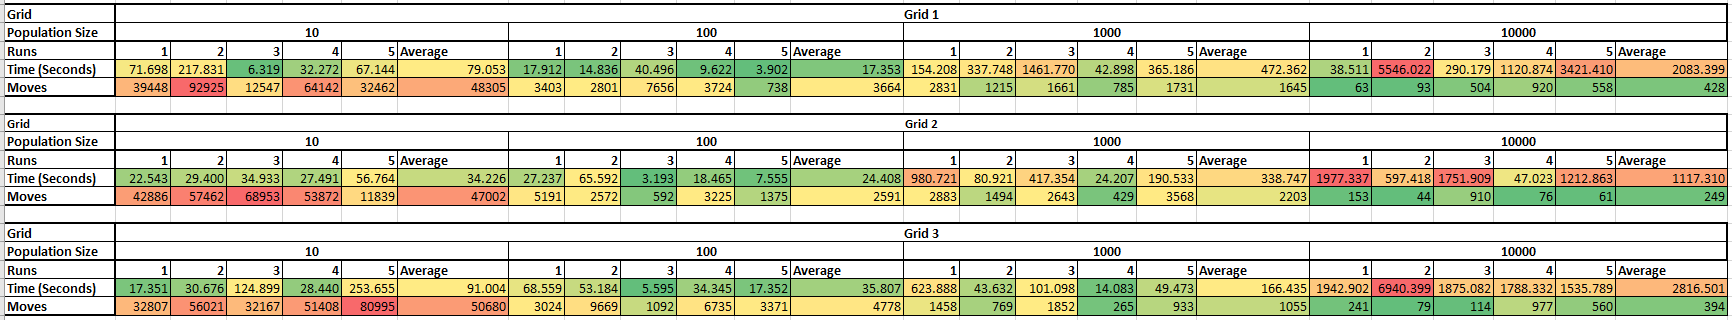
Table 1: This table shows the times recorded and number of runs for all 60 runs. This was recorded using python running on a computer, which is faster than colab. The performance is also likely to vary significantly if these were run again but is useful for averages and comparison between the different runs. 
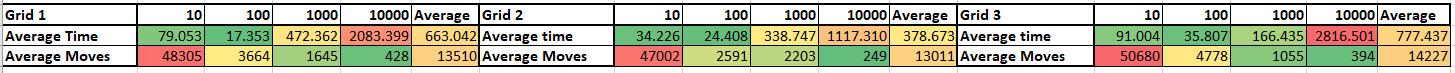

Table 2: This table shows the average times (in seconds) and average moves across each of the five runs made.

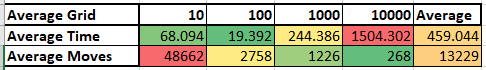

Table 3: This table shows the average time (in seconds) and average number of moves made across all the grids for the population size 10, 100, 1000, 10000 and an average population size.

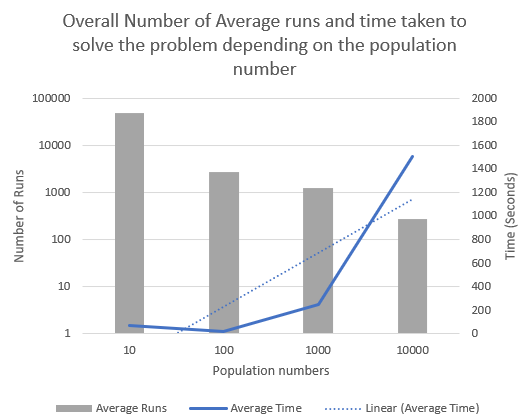

Graph 1: This graph is a combination of line graph showing average time and a bar graph showing average moves. A logarithmic scale is being used for the average moves. The data is relating to the average of all the grids. For the average time there is a linear trend lines showing that as population number increases there is an increase in average time taken to solve the problem.

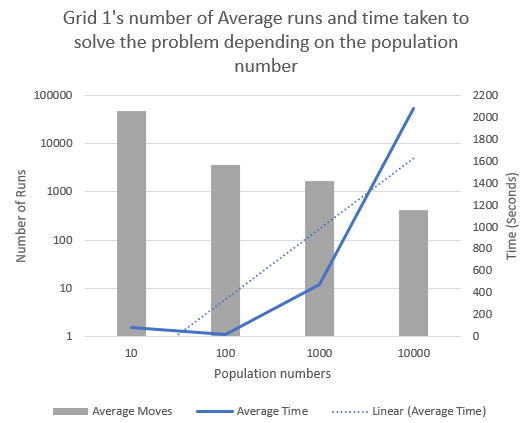

Graph 2: This graph is a combination of line graph showing average time and a bar graph showing average moves. A logarithmic scale is being used for the average moves. The data is relating to grid one. For the average time there is a linear trend lines showing that as population number increases there is a slight increase in average time taken to solve the problem.

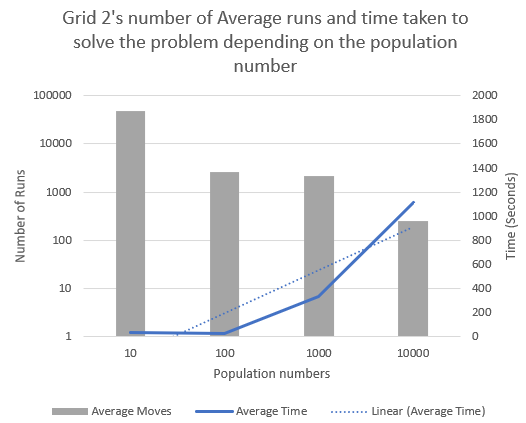

Graph 3: This graph is a combination of line graph showing average time and a bar graph showing average moves. A logarithmic scale is being used for the average moves. The data is relating to grid two. For the average time there is a linear trend lines showing that as population number increases there is an increase in average time taken to solve the problem.

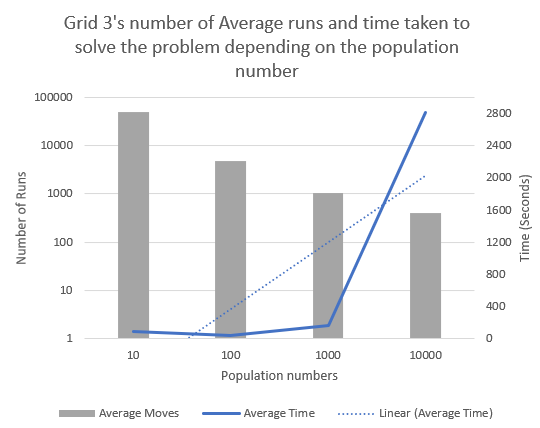

Graph 4: This graph is a combination of line graph showing average time and a bar graph showing average moves. A logarithmic scale is being used for the average moves. The data is relating to grid three. For the average time there is a linear trend lines showing that as population number increases there is an increase in average time taken to solve the problem.

## Question 2.2: Analysis of the Sudoko problem using Evolutionary algorithm

#### 1) What population size was the best?

The best population size 100.

#### 2) What do you think is the reason for your findings in question 2.1?

The population size of 100 is the best since its average time was only 19 seconds, a full minute difference with the following best, the population size of 10. As there was an increase in population size, more iterations were required per move, hence the consistent reduction in the number of moves as population size increases. However, this would suggest that a population size of 10 would be best. This can be explained since the small population size of 10 meant that mutations could have a more significant negative impact as there are fewer grids to pick. This led to damaging mutations making it easier to spread through the population. The graphs further show that a population size of 100 is best, with each showing a noticeable dip between 10 and 1000.

#### 3) Which grid was the easiest and which the hardest to solve?

The hardest to solve was grid three and the easiest was grid two.

#### 4) What do you think might be the reason for your findings in question 2.3?

Grid three is the hardest to solve since it has the highest average time of 777.437 seconds. It could be argued that run two for population size 10000 of grid one, and grid three are anomalies, taking between one and a half hours to two hours. These values are more than double their averages. However, with the removal of these anomalies, grid three still has the highest average time of 519.693, with the closet still being grid 1 with 446.628 seconds. Grid three likely has the highest average time since it already has the highest average number of moves, 14227. 

The easiest to solve is grid two since it has the lowest average time of all the grids. It only took 378.673 seconds, less than half of the average time of grid three. This is likely because it has the lowest average number of moves, only 13011. 

The average move time (in seconds) for each grid is grid one1 (0.0491), grid two (0.0291) and grid three (0.0546). This further shows that grid 3 is the hardest to solve and that grid 2 is the easiest.

#### 5) What further experiments do you think it may be useful to do and why?

Further experiments could be done with more population sizes. Running tests on population sizes between the four in this experiment could be used to find the optimum population number. Being able to find the optimum population number allows for better performing algorithm. This could be expanded by changing the variable from population size to many generations, truncation percentage or mutation rate. Nevertheless, again, finding the optimum values for these would improve performance. 

More runs should be conducted to get more accurate results for this experiment since (especially with more significant population numbers) there was higher variability in time, resulting in anomalies. Another way to get more accurate results is to test on a more extensive range of grids (mainly compete to primarily empty) and test on more grids.